<a href="https://colab.research.google.com/github/kimwoongi/making-own-AI-cells/blob/master/4.%20%EB%82%98%EB%A7%8C%EC%9D%98%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나만의 이미지 분류기

### 1. 설정 정의

In [ ]:
index2name = {
    0: '마카롱',
    1: '티라미수',
    2: '타르트'
}

몇번학습 = 100
학습률 = 1e-7

### 2. 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive', force_remount=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 3. 데이터 로드 및 전처리

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


num_classes: 3
x_shape: (30, 32, 32, 3)
y_shape: (30, 3)


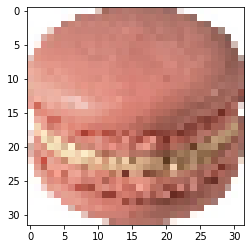

0번째 데이터 : 티라미수


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt   

train_path = './gdrive/My Drive/Colab Notebooks/myai/train/'
test_path = './gdrive/My Drive/Colab Notebooks/myai/test/'
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

x = [cv2.imread(train_path + file) for file in train_files]
x = [cv2.cvtColor(each, cv2.COLOR_BGR2RGB) / 255 for each in x]
x = np.asarray([cv2.resize(each, (32, 32), interpolation=cv2.INTER_CUBIC) for each in x])

x_test = [cv2.imread(test_path + file) for file in test_files]
x_test = [cv2.cvtColor(each, cv2.COLOR_BGR2RGB) / 255for each in x_test]
x_test = np.asarray([cv2.resize(each, (32, 32), interpolation=cv2.INTER_CUBIC) for each in x_test])

y = [int(file.split('_')[0]) for file in train_files] 
y_test = [int(file.split('_')[0]) for file in test_files] 
num_classes = len(index2name)
eye = np.eye(num_classes)
y = np.asarray([eye[each] for each in y])
y_test = np.asarray([eye[each] for each in y_test])

print('num_classes:', num_classes)
print('x_shape:', x.shape)
print('y_shape:', y.shape)

i = 0
plt.imshow(x[i])                                     # i번째 데이터를 이미지로 보이기
plt.show()
print(f'{i}번째 데이터 : {index2name[y[i][0]]}')

In [ ]:
# ls './gdrive/My Drive/Colab Notebooks/myai/'

In [ ]:
from keras import optimizers
dir(optimizers)
dir(optimizers.gradient_descent_v2)

['SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'keras_export',
 'optimizer_v2',
 'tf']

### 4. 모델

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense
from keras.optimizers import adam_v2, gradient_descent_v2

act = 'tanh'

model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(64, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Dense(num_classes, activation='softmax'))

# adam = adam_v2.Adam(lr=몇번학습)
# sgd = gradient_descent_v2.SGD(lr=몇번학습)
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

### 5. 학습

In [ ]:
history = model.fit(x, y, epochs=몇번학습, validation_data = (x_test, y_test))


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.3277 - accuracy: 0.4000 - val_loss: 1.0683 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 106ms/step - loss: 0.3023 - accuracy: 0.8333 - val_loss: 2.0492 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 107ms/step - loss: 5.7003 - accuracy: 0.3667 - val_loss: 3.3626 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 103ms/step - loss: 3.7476 - accuracy: 0.3333 - val_loss: 4.2386 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 103ms/step - loss: 4.3396 - accuracy: 0.5000 - val_loss: 1.5472 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 101ms/step - loss: 1.3982 - accuracy: 0.6000 - val_loss: 2.1041 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6767 - accuracy: 0.7333 - val_loss: 2.4865 - val_accuracy: 0.3333
Epoch 8/100
1/

### 6. 예측

In [ ]:
y_pred = model.predict(x_test)
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

y_pred_names = [index2name[y_pred2[i]] for i in range(len(y_pred2))]
y_test_names = [index2name[y_test2[i]] for i in range(len(y_test2))]

count = 0
total = len(y_test_names)
for i, (y_pred_name, y_test_name) in enumerate(zip(y_pred_names, y_test_names)):
  if y_pred_name == y_test_name:
    count += 1
accuracy = count / total * 100

print('정답들:', y_test_names)
print('예측들:', y_pred_names)
print('정확도:', accuracy)


정답들: ['티라미수', '마카롱', '티라미수', '마카롱', '타르트', '타르트']
예측들: ['티라미수', '타르트', '티라미수', '마카롱', '타르트', '타르트']
정확도: 83.33333333333334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


타르트


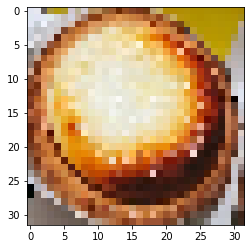

In [ ]:
import matplotlib.pyplot as plt

i = 4
image = x_test
label = y_pred_names

print(label[i])
plt.imshow(image[i])
plt.show()
